In [1]:
import sys; sys.path.insert(0,'../')
from notebook_tools import *
from matplotlib.ticker import LinearLocator
%matplotlib inline

Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!
Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent GenerateEvents!


# load data

In [55]:
sims = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/OrTrees_BinomTest_results_binom_p_0.33.csv')
weird_sims_03 = sims[(sims['run']==104155)]
weird_sims_03[['run','Nattempts','Pval_binom_test_Nsucsseses']]

,run,Nattempts,Pval_binom_test_Nsucsseses
102,104155.0,99900.0,1.000000
2982,104155.0,31980.0,0.468475


In [17]:
def remove_unreconstructed_runs( sample=None ,name=''):
    sample=sample[(sample['parameters_reconstructed_well']=='True')|(sims['parameters_reconstructed_well']==True)]
    sample.fillna(0.0,inplace=True)
    print len(sample),'runs in the sample',name
    return sample


tab completion not implemented for this context


In [46]:
# sims_05 = remove_unreconstructed_runs(pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/OrTrees_BinomTest_results.csv'),'sims_05')
# sims_025 = remove_unreconstructed_runs(pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/OrTrees_BinomTest_results_binom_p_0.25.csv'),'sims_025')
# sims_01 = remove_unreconstructed_runs(pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/OrTrees_BinomTest_results_binom_p_0.10.csv'),'sims_01')
sims_03 = remove_unreconstructed_runs(pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/OrTrees_BinomTest_results_binom_p_0.33.csv'),'sims_03')

9819 runs in the sample sims_03


## can the number of attempts be used to kill large b_2?

In [53]:
weird_sims_03 = sims_03[(sims_03['Nattempts']>70000)&(sims_03['Pval_binom_test_Nsucsseses']>1.e-10)]
weird_sims_03[['run','Nattempts','Pval_binom_test_Nsucsseses']]

,run,Nattempts,Pval_binom_test_Nsucsseses
102,104155.0,99900.0,1.000000e+00
167,104242.0,81740.0,2.156912e-02
202,104290.0,70680.0,7.990289e-01
587,104847.0,71000.0,1.431960e-03
610,104881.0,72460.0,2.335191e-05
672,104963.0,82620.0,3.279255e-01
751,105074.0,74500.0,2.272502e-01
821,105169.0,73920.0,8.385288e-06
831,105181.0,81440.0,6.565035e-01
944,105338.0,71020.0,5.561386e-01


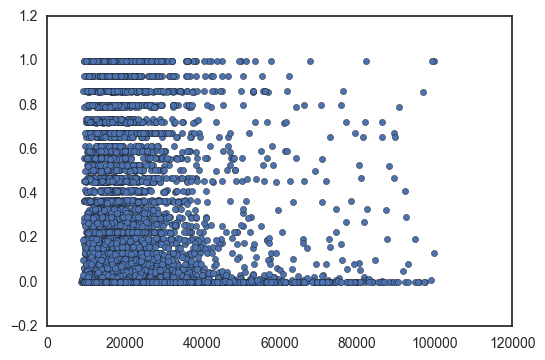

In [47]:
# plt.figure()
# plt.scatter(sims_05['Nattempts'],sims_05['Pval_binom_test_Nsucsseses']);
# plot_2d_hist(sims_05['Nattempts'],sims_05['Pval_binom_test_Nsucsseses'],bins=(np.linspace(5000,50000,50),np.linspace(-0.1,1.1,50)),norm='log');
# plt.figure()
# plt.scatter(sims_025['Nattempts'],sims_025['Pval_binom_test_Nsucsseses']);
# plot_2d_hist(sims_025['Nattempts'],sims_025['Pval_binom_test_Nsucsseses'],bins=(np.linspace(5000,50000,50),np.linspace(-0.1,1.1,50)),norm='log');
# plot_2d_hist(sims_025['gen_b2'],sims_025['Pval_binom_test_Nsucsseses'],bins=(np.linspace(-0.1,0.6,50),np.linspace(-0.1,1.1,50)),norm='log');
# plot_2d_hist(sims_025['gen_b2'],sims_025['Nattempts'],bins=(np.linspace(-0.1,0.6,50),np.linspace(5000,30000,50)));
# plot_2d_hist(sims_025['gen_b2'],sims_025['Nattempts'],weights=sims['Pval_binom_test_Nsucsseses'],bins=(np.linspace(-0.1,0.6,50),np.linspace(5000,30000,50)));

# plot_2d_hist(sims_03['gen_b2'],sims_03['Nattempts'],bins=(np.linspace(-0.1,0.6,50),np.linspace(5000,30000,50)));
# plot_2d_hist(sims_03['gen_b2'],sims_03['Nattempts'],weights=sims['Pval_binom_test_Nsucsseses'],bins=(np.linspace(-0.1,0.6,50),np.linspace(5000,30000,50)));



plt.figure()
plt.scatter(sims_03['Nattempts'],sims_03['Pval_binom_test_Nsucsseses']);
# plot_2d_hist(sims_03['Nattempts'],sims_03['Pval_binom_test_Nsucsseses'],bins=(np.linspace(5000,30000,50),np.linspace(-0.1,0.6,50)),norm='log');
# plot_2d_hist(sims_03['gen_b2'],sims_03['Pval_binom_test_Nsucsseses'],bins=(np.linspace(-0.1,0.6,40),np.linspace(-0.1,0.6,50)),norm='log');


tab completion not implemented for this context


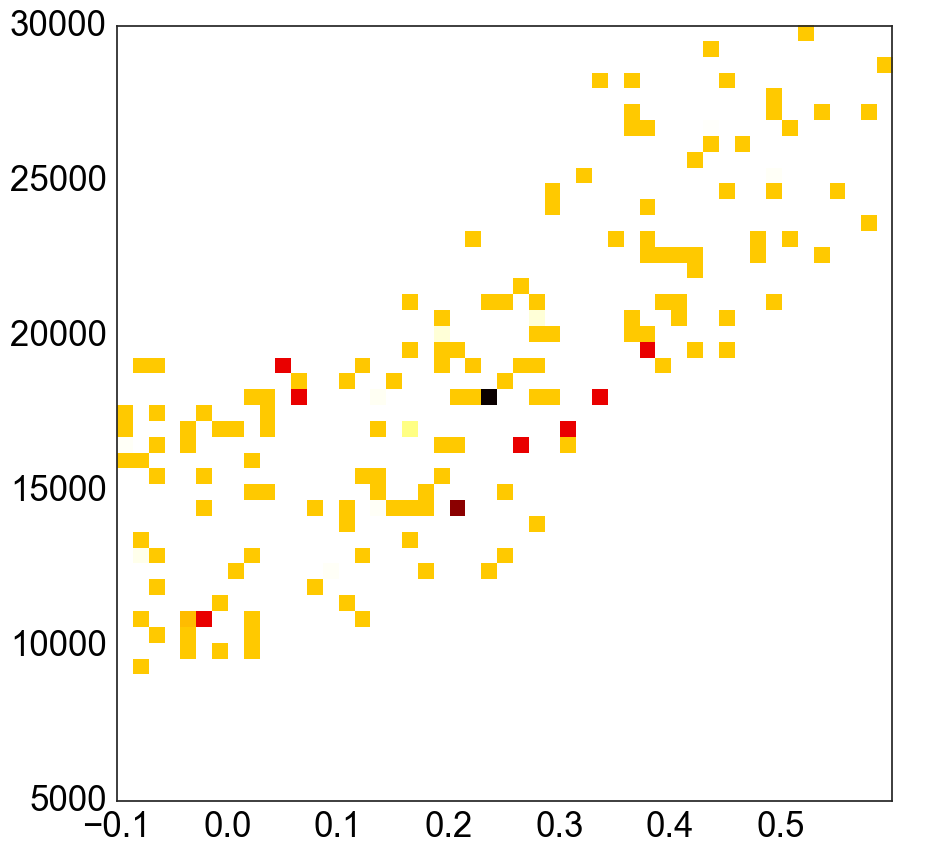

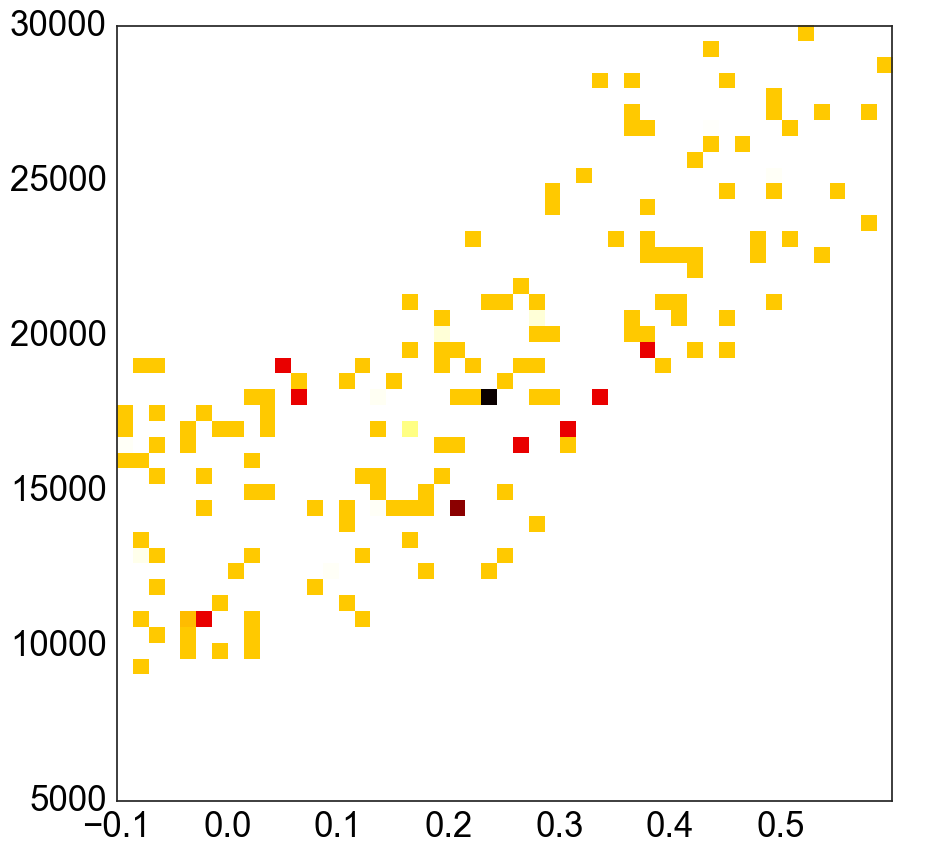

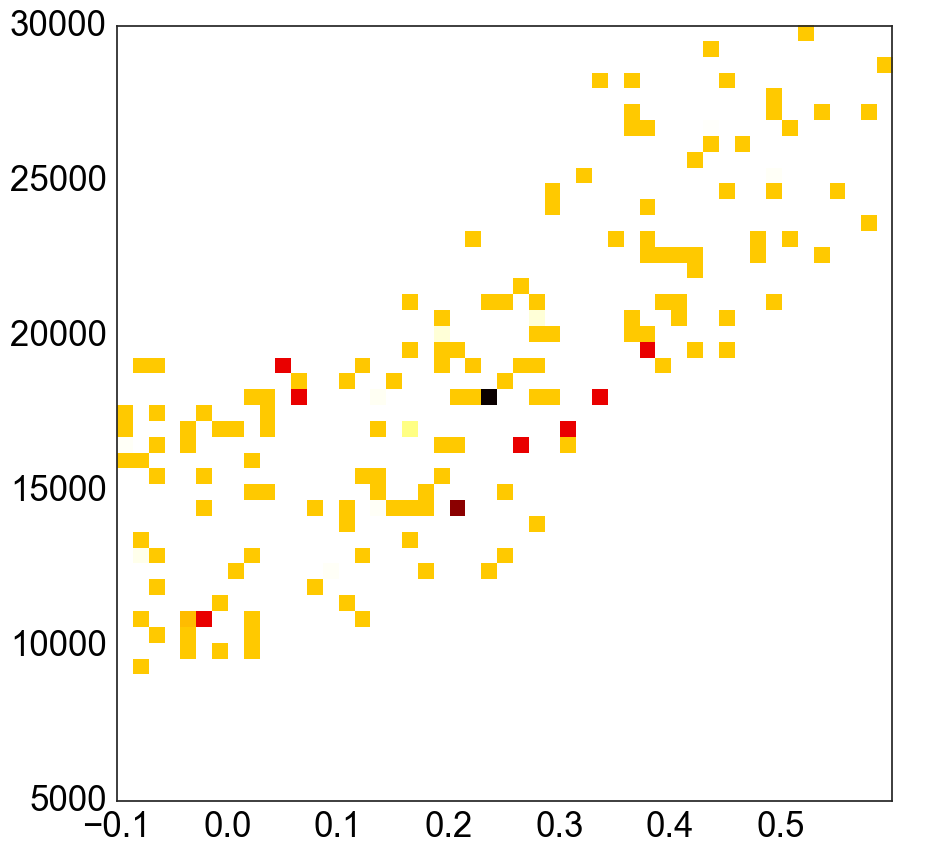

In [26]:
plot_2d_hist(sims_05['gen_b2'],sims_05['Nattempts'],weights=sims['Pval_pcmXYZ_binom_Fe56'],bins=(np.linspace(-0.1,0.6,50),np.linspace(5000,30000,50)));
plot_2d_hist(sims_025['gen_b2'],sims_025['Nattempts'],weights=sims['Pval_pcmXYZ_binom_Fe56'],bins=(np.linspace(-0.1,0.6,50),np.linspace(5000,30000,50)));
plot_2d_hist(sims_01['gen_b2'],sims_01['Nattempts'],weights=sims['Pval_pcmXYZ_binom_Fe56'],bins=(np.linspace(-0.1,0.6,50),np.linspace(5000,30000,50)));

58.2% of the sample are retained for Nattemps<20000


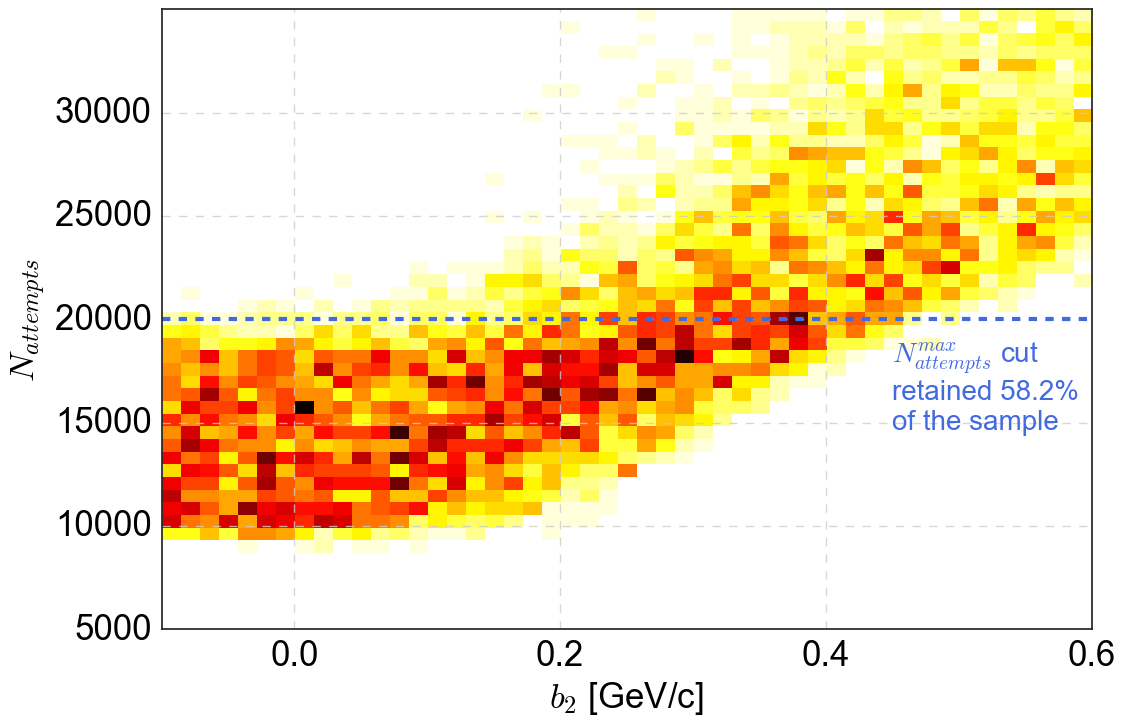

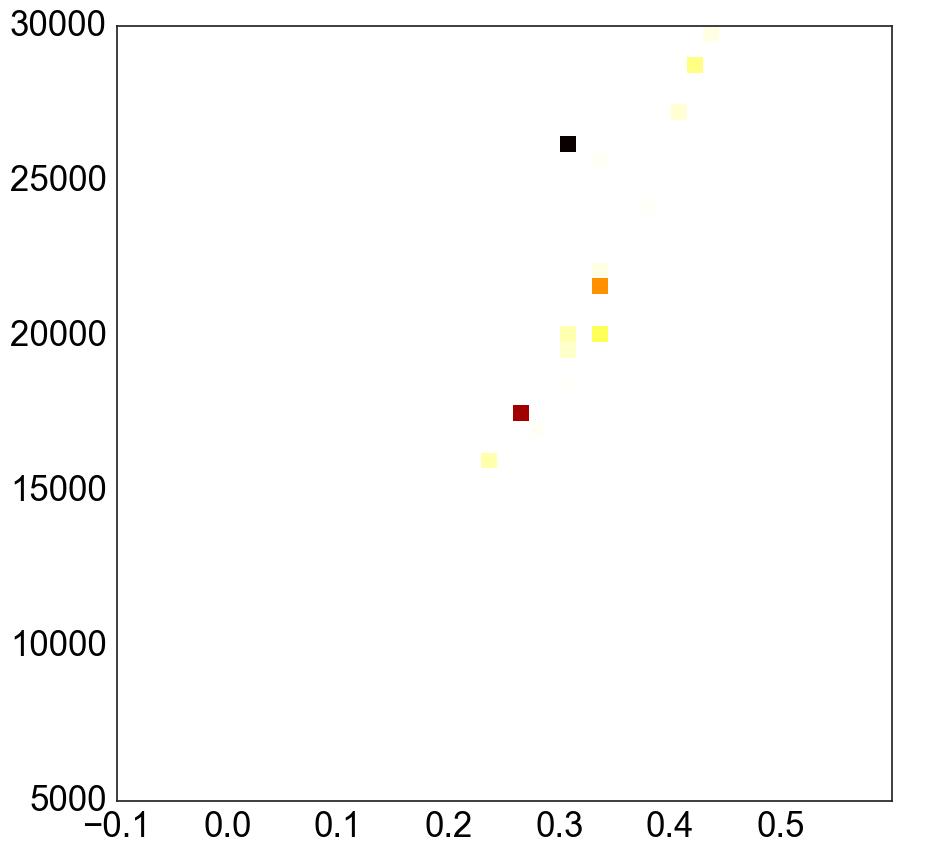

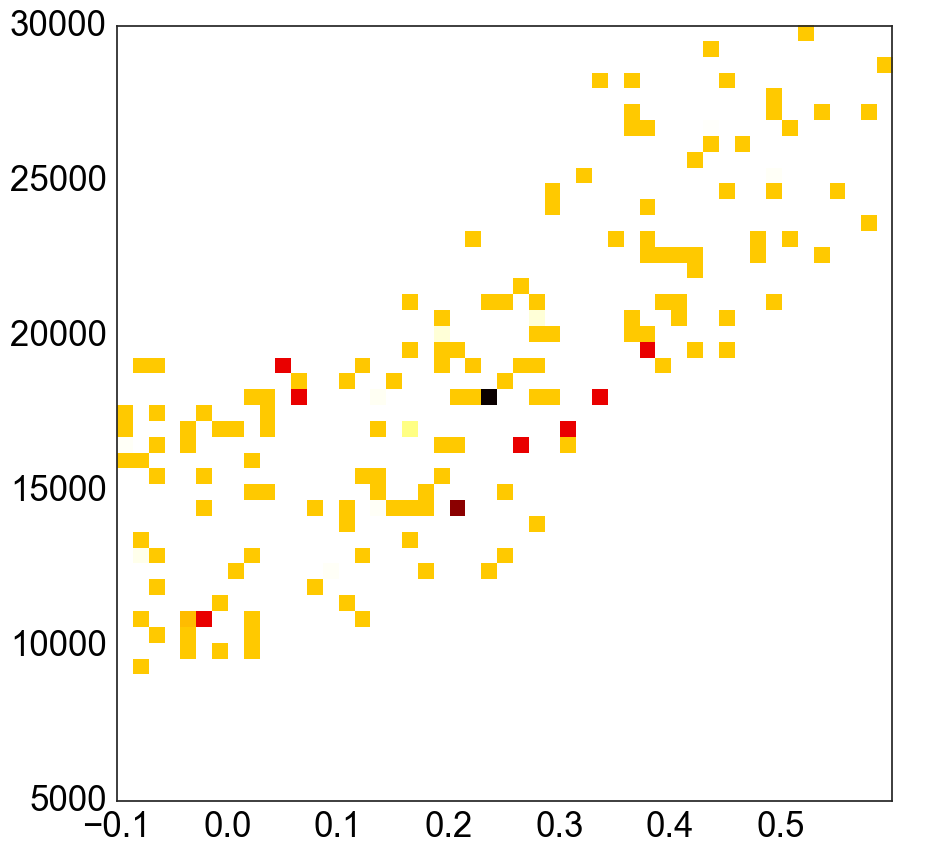

In [10]:
max_Nattempts_cut = 20000
reduced_sims = sims[sims['Nattempts']<max_Nattempts_cut]
fgood = 100*float(len(reduced_sims))/len(sims)
print '%.1f'%fgood+'%'+' of the sample are retained for Nattemps<%d'%max_Nattempts_cut


fig,ax=plt.subplots(figsize=(12,8))
plot_2d_hist(sims['gen_b2'],sims['Nattempts'],bins=(np.linspace(-0.1,0.6,50),np.linspace(5000,35000,50)),ax=ax);
set_axes(ax,'$b_2$ [GeV/c]','$N_{attempts}$'
         ,xticks=[0.0,0.2,0.4,0.6],yticks=[5000,10000,15000,20000,25000,30000]
         ,do_add_grid=True)
plt.plot(ax.get_xlim(),[max_Nattempts_cut,max_Nattempts_cut],'--',color='royalblue',linewidth=3)
plt.text(0.45,0.75*max_Nattempts_cut,'$N_{attempts}^{max}$ cut\nretained %.1f'%fgood+'%'+'\nof the sample',color='royalblue',fontsize=20)

plot_2d_hist(sims['gen_b2'],sims['Nattempts'],weights=sims['ks_Pval_pcmX_pcmY_pcmZ_scaled_1e20_Fe56'],bins=(np.linspace(-0.1,0.6,50),np.linspace(5000,30000,50)));


## sigma_t

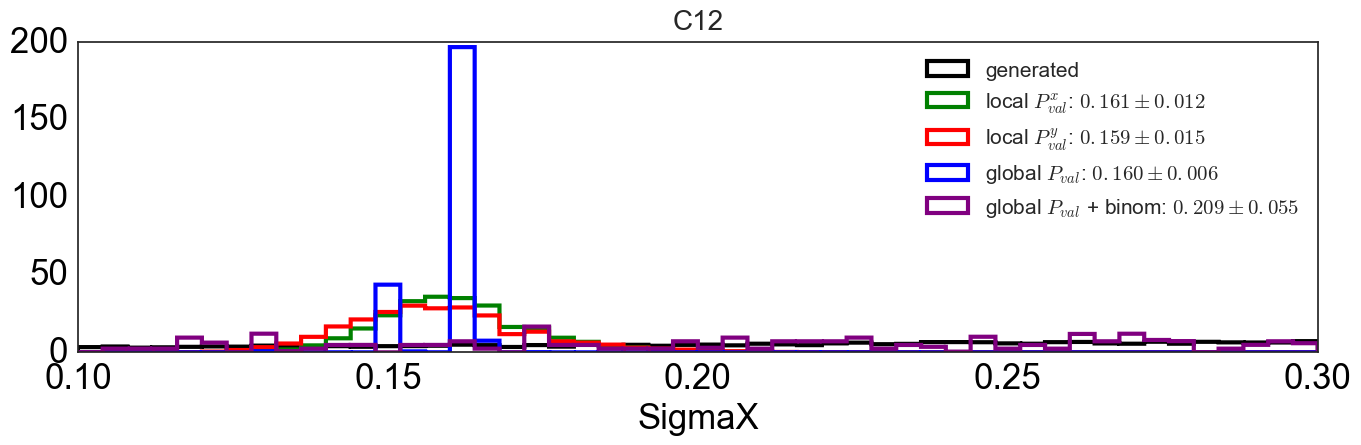

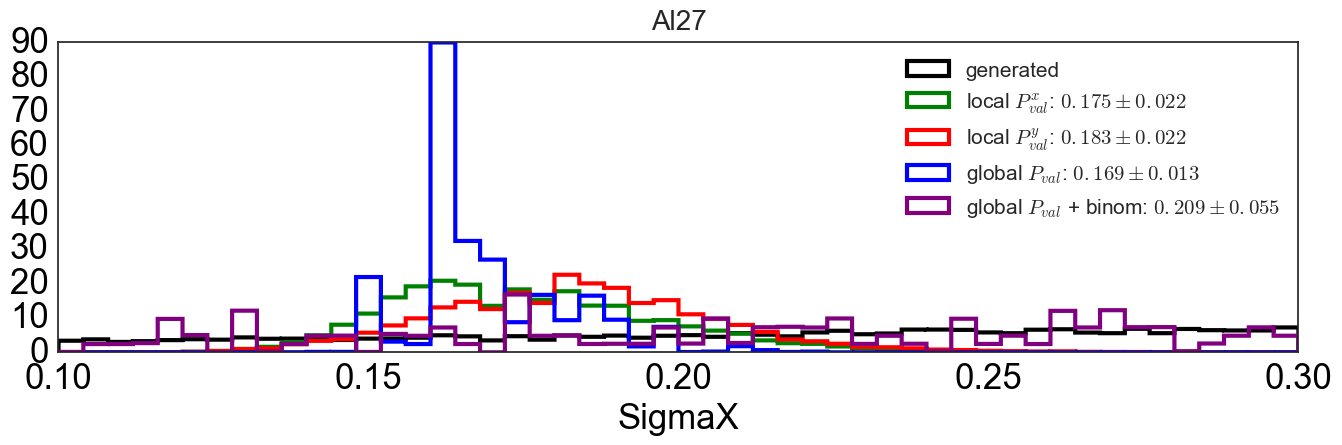

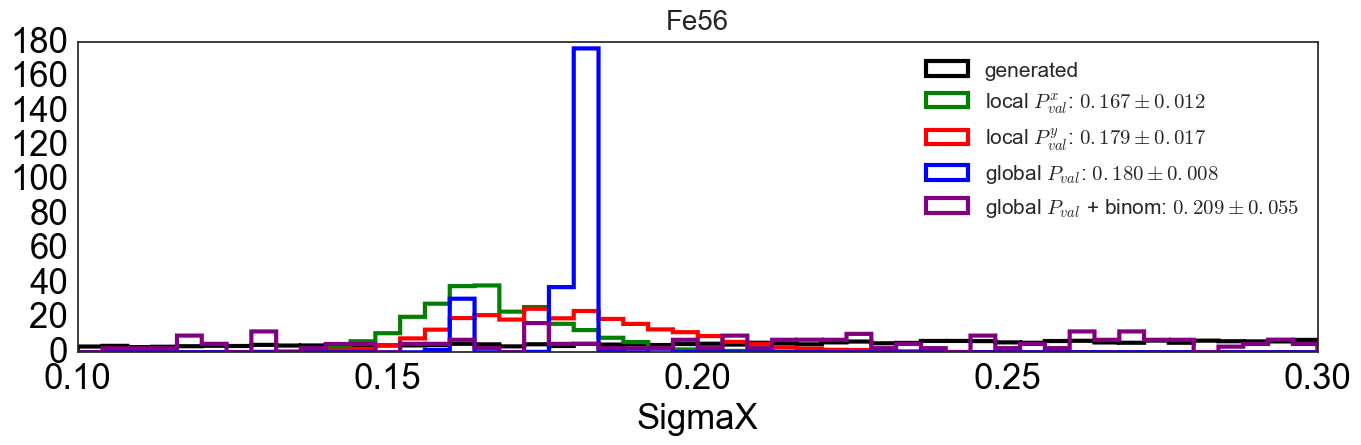

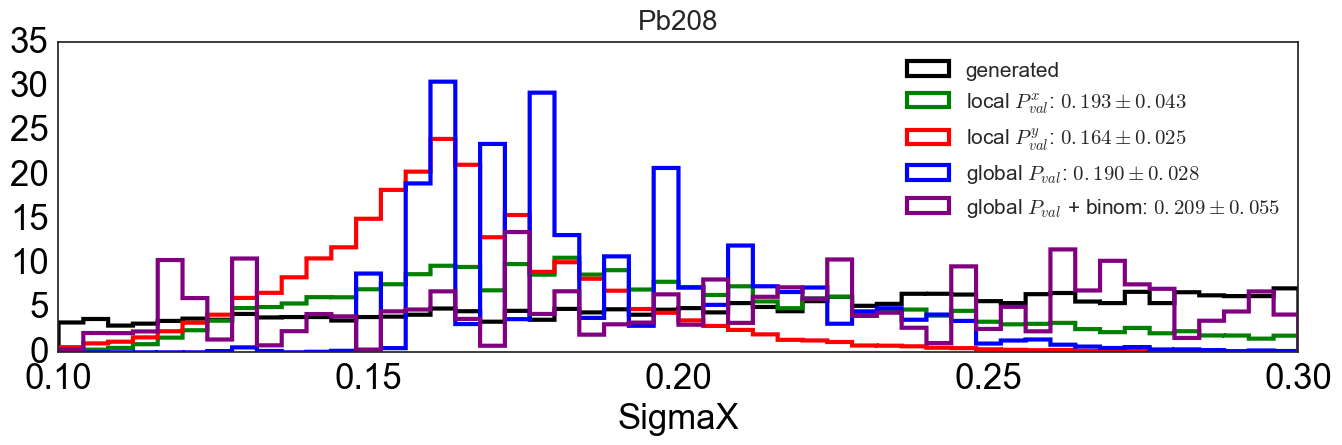

In [11]:
parameter = 'SigmaX'

for target in ['C12','Al27','Fe56','Pb208']:    
    fig,ax = plt.subplots(figsize=(16,4))
    x = reduced_sims['gen_'+parameter] 
    h,bins,_=plt.hist(x,bins=50,normed=1,histtype='step',linewidth=3,color='black',label='generated')
    weights_array = [
        'ks_local_Pval_pcmX_'+target,        
        'ks_local_Pval_pcmY_'+target,        
        'ks_Pval_pcmX_pcmY_pcmZ_scaled_1e20_'+target,
        'Pval_pcmXYZ_binom_'+target,
#         'ks_PvalTotal_'+target,
    ] 
    labels = [
        'local $P_{val}^{x}$',
        'local $P_{val}^{y}$',
        'global $P_{val}$',
        'global $P_{val}$ + binom',
#         'ks_PvalTotal_'+target,
    ]    
    colors = ['green','red','blue','purple','salmon','black','cyan','yellow']
    y_max,mu,sigma=0,[],[]
    for i,weights_name,color,label in zip(range(len(weights_array)),weights_array,colors,labels):
        weights = reduced_sims[weights_name]
        if np.sum(weights)>0:
            mu.append(np.average(x , weights=weights))
            sigma.append(np.sqrt(np.average((x-mu[-1])**2, weights=weights)))
            h,bins,_=plt.hist(x,weights=weights,bins=bins,normed=1,histtype='step',linewidth=3
                              ,color=color,label=label+': $%.3f\\pm%.3f$'%(mu[-1],sigma[-1]));
            if np.max(h)>y_max: y_max=np.max(h)
        else: print weights_name,'sum to 0'
    ax.legend(loc='best',fontsize=15)
    set_axes(ax,x_label=parameter,fontsize=25)
    ax.set_title(target,fontsize=20,y=1.02)    

plotting C12
plotting Al27
plotting Fe56
plotting Pb208


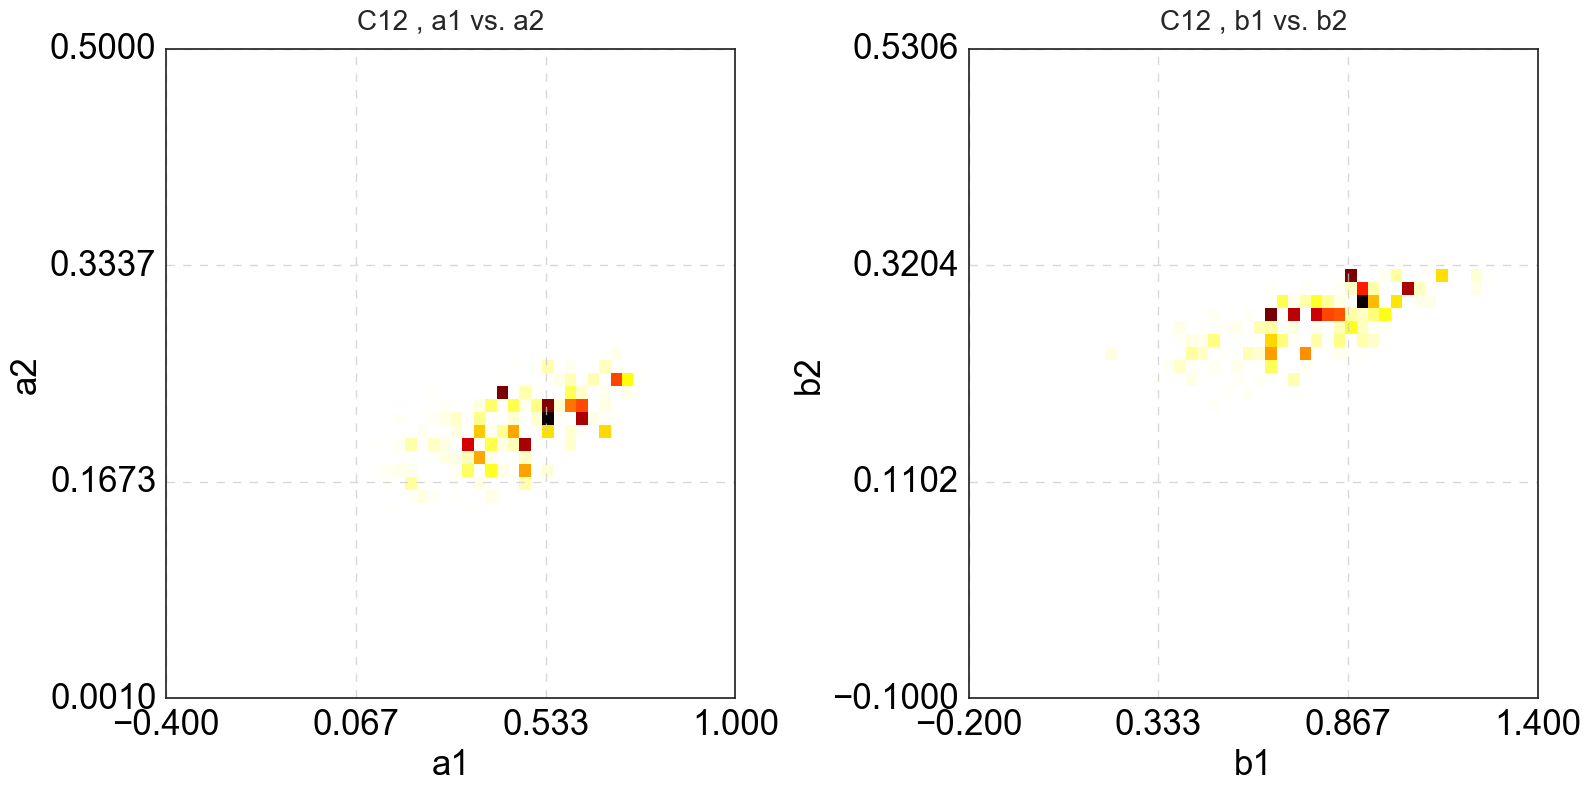

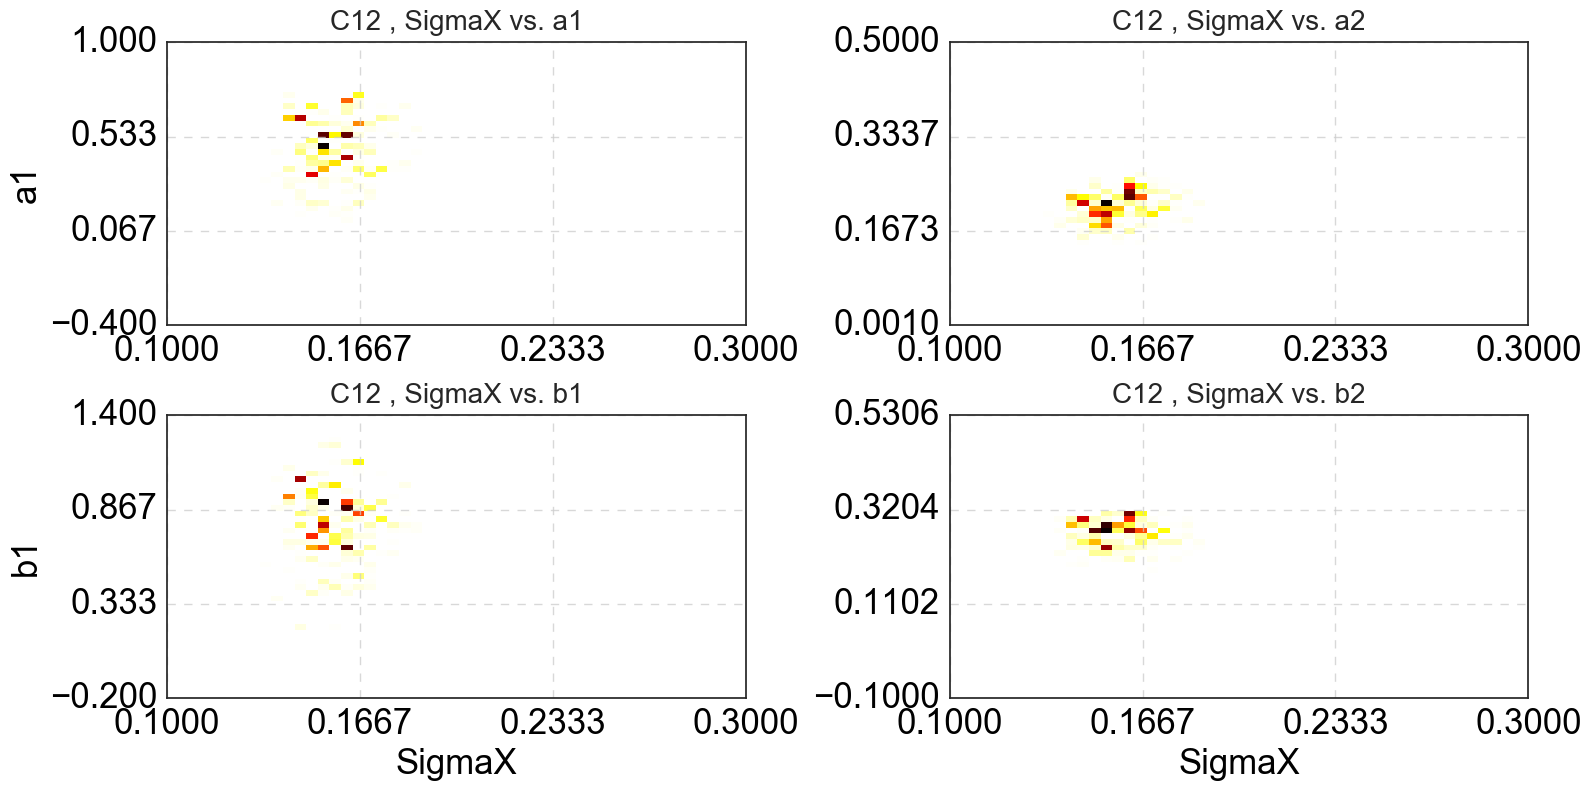

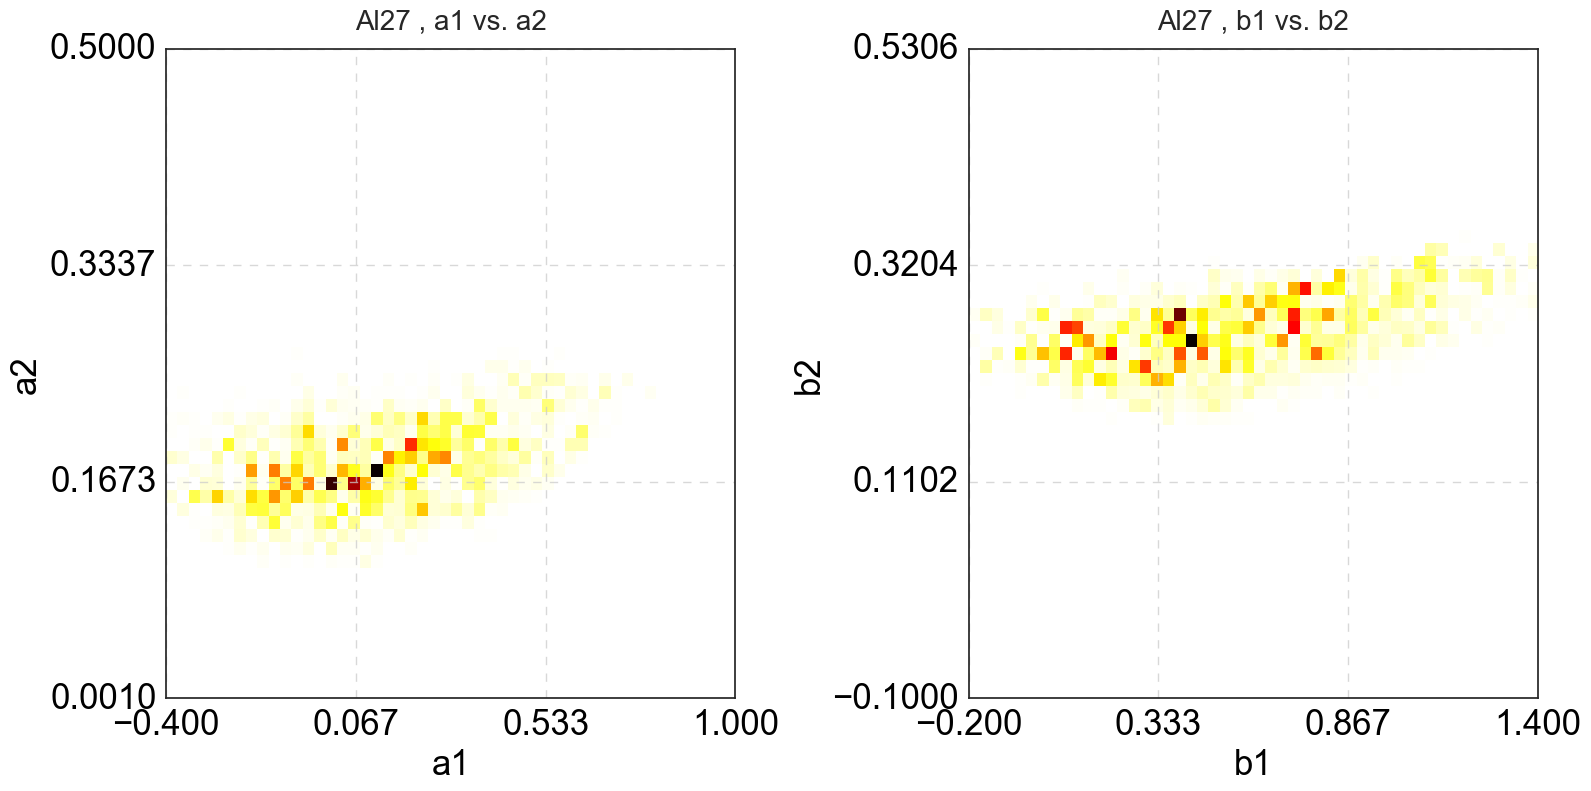

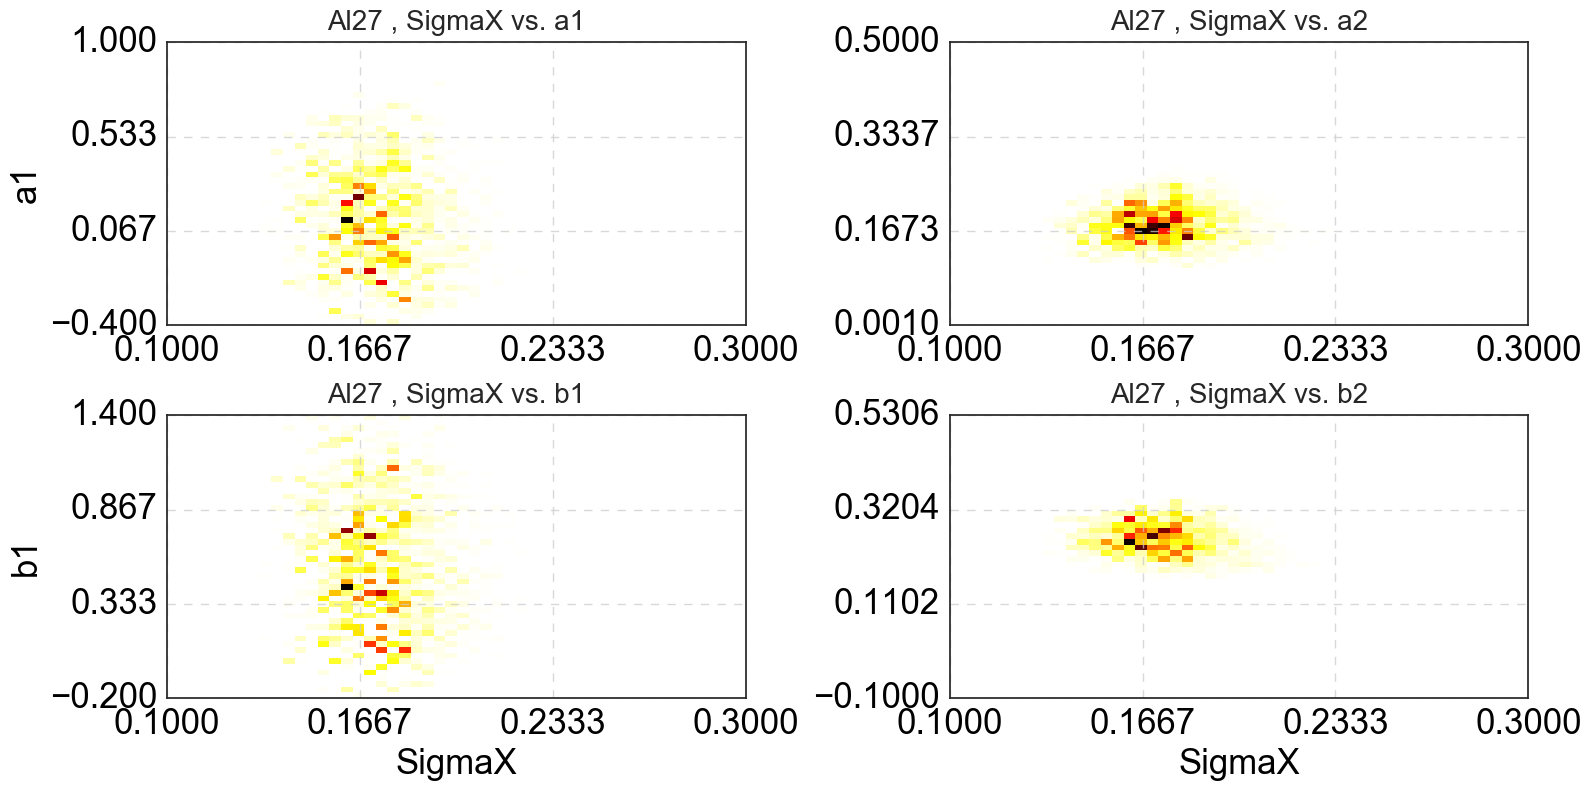

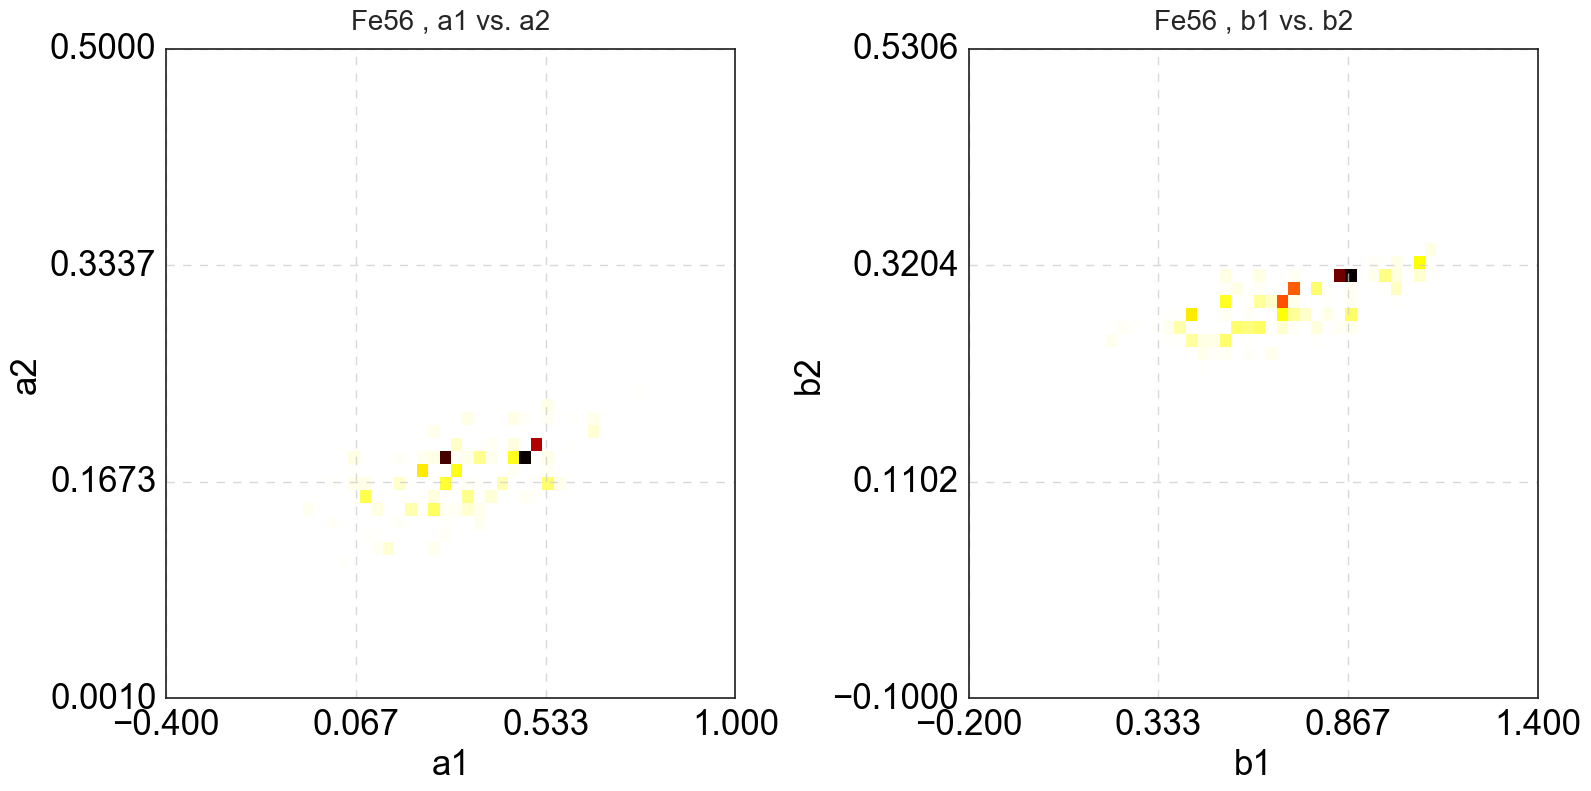

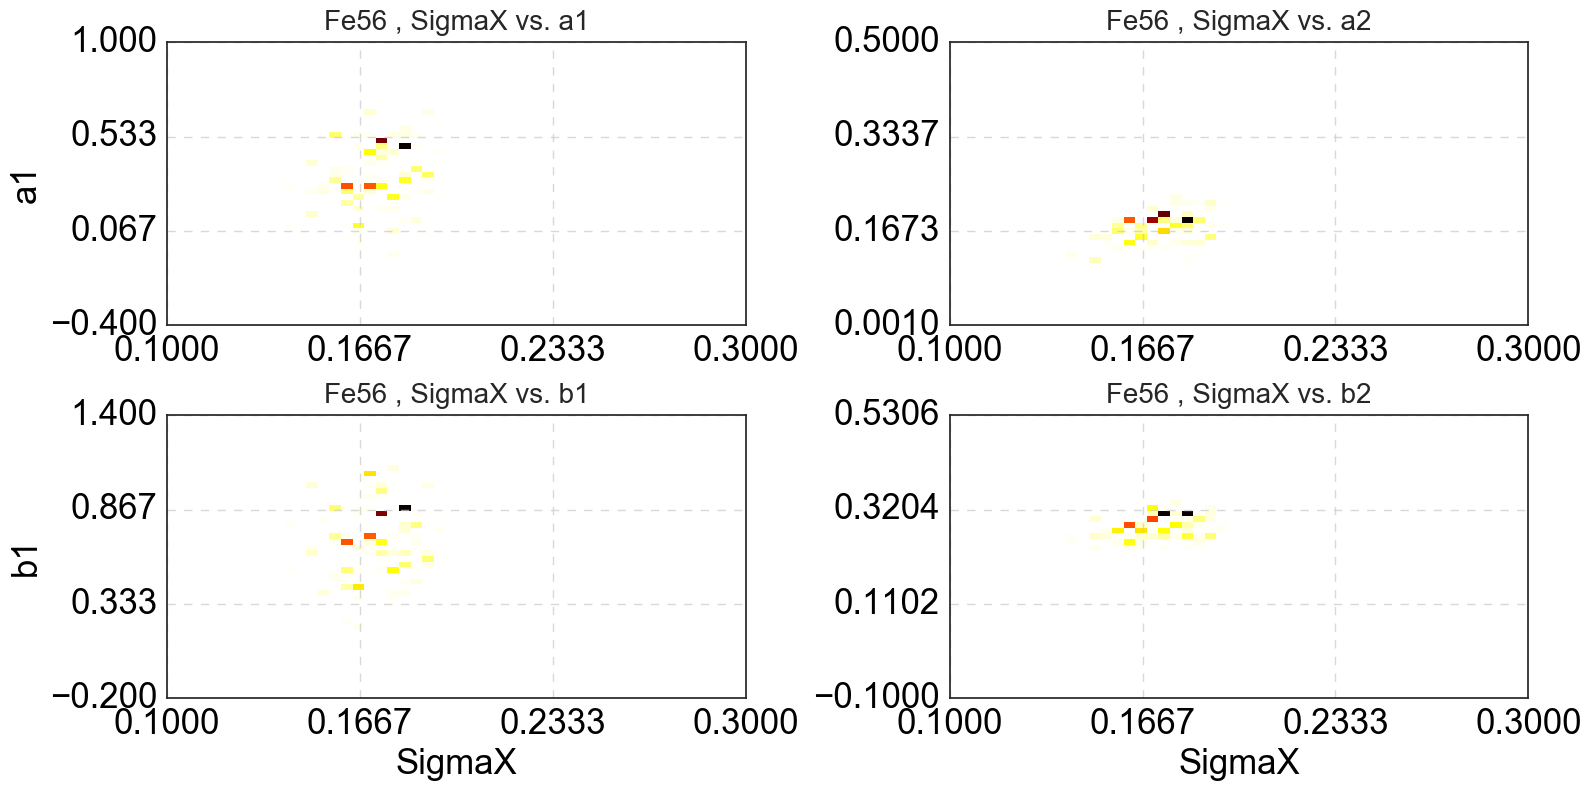

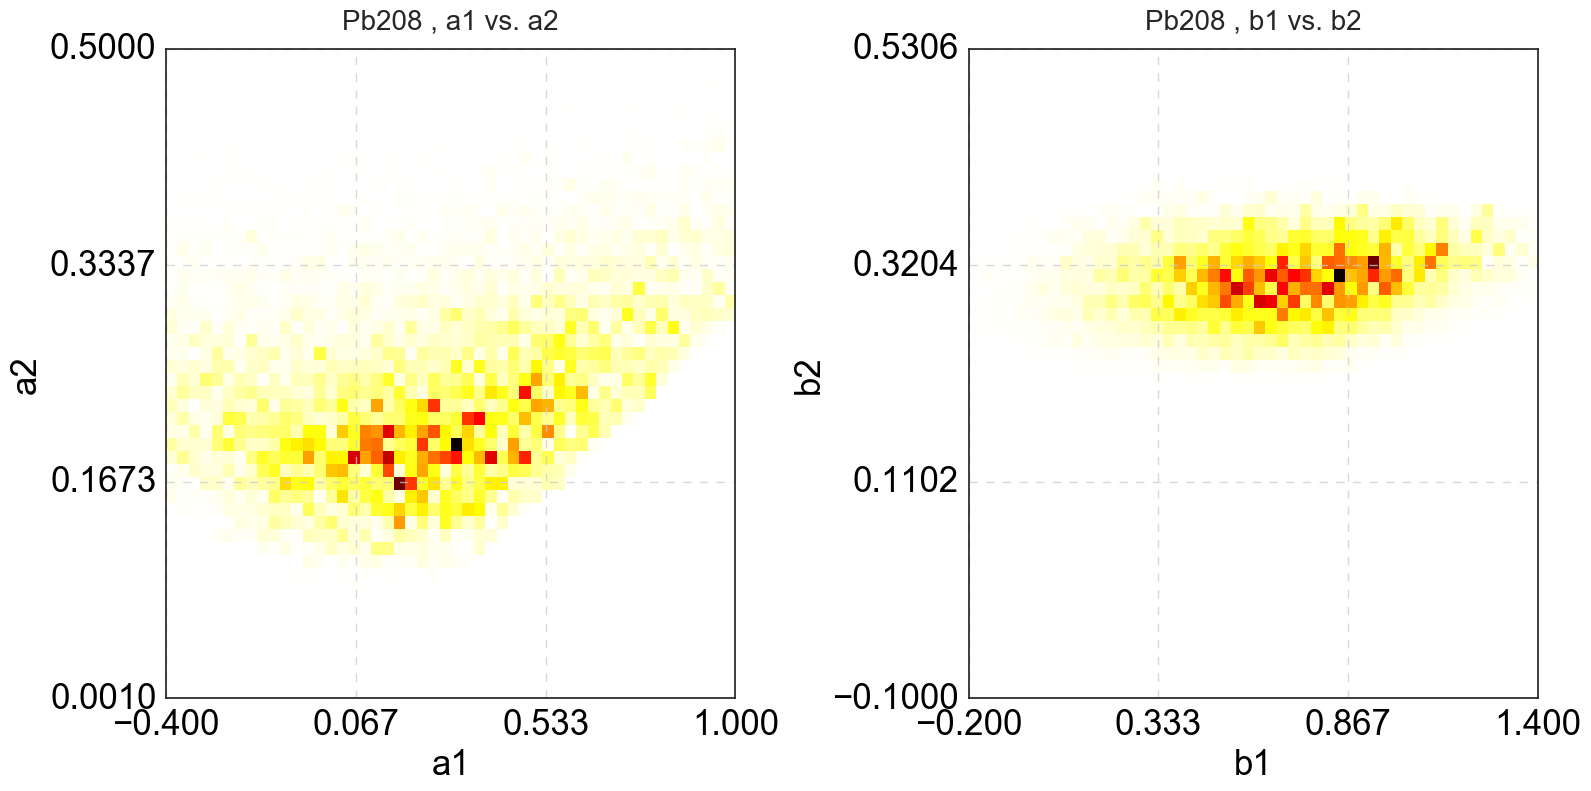

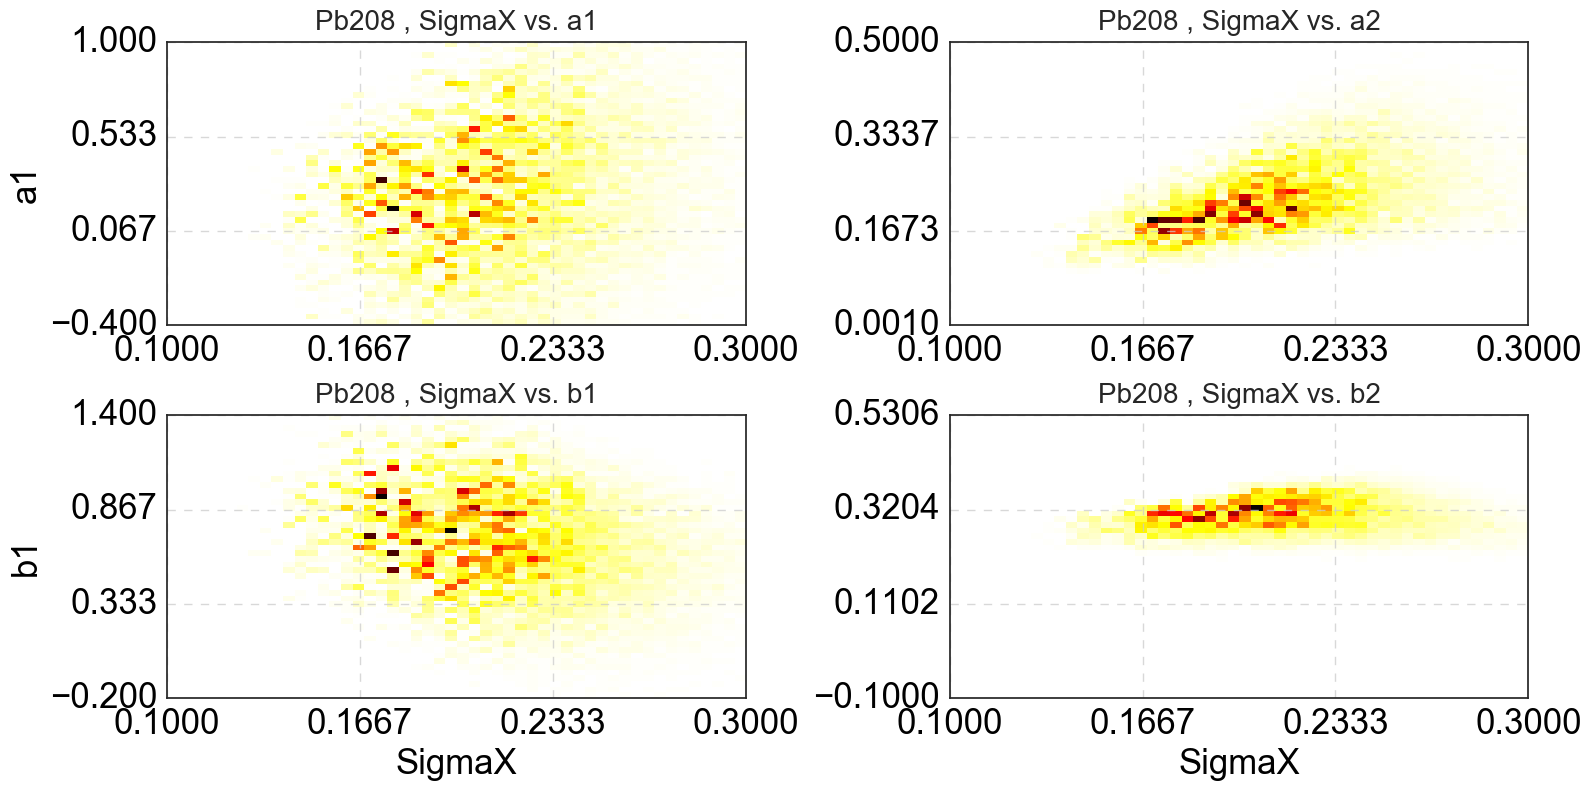

In [14]:
for target in ['C12','Al27','Fe56','Pb208']:    
    print 'plotting '+target
#     weights=sample['ks_local_Pval_pcmZ_'+target]
#     weights=sample['ks_Pval_pcmX_pcmY_pcmZ_'+target]
#     weights=sample['ks_Pval_pcmX_pcmY_pcmZ_Bonferroni_'+target]        
#     weights=sample['ks_Pval_pcmX_pcmY_pcmZ_Ruschendorf_'+target]
    weights=reduced_sims['ks_PvalTotal_'+target]
    fig = plt.figure(figsize=(16,8))
    for i,parameter_i,parameter_j in zip(range(4)
                                               ,['a1','b1']
                                               ,['a2','b2']):
        ax = fig.add_subplot(1 ,2 , i+1)
        ax.set_title( target + ' , ' + parameter_i + ' vs. ' + parameter_j,fontsize=20,y=1.02)
        plot_2d_hist(reduced_sims['gen_'+parameter_i],reduced_sims['gen_'+parameter_j]
                     ,weights=weights,norm=''
                     ,xlabel=parameter_i,ylabel=parameter_j,ax=ax,fontsize=25);
        ax.grid(linestyle='--',alpha=0.75)
    plt.tight_layout()
    
    fig = plt.figure(figsize=(16,8))
    for i,parameter_i,parameter_j in zip(range(6)
                                               ,['SigmaX','SigmaX','SigmaX','SigmaX']
                                               ,['a1','a2','b1','b2']):
        ax = fig.add_subplot(2 ,2 , i+1)
        ax.set_title( target + ' , ' + parameter_i + ' vs. ' + parameter_j,fontsize=20,y=1.02)
        plot_2d_hist(reduced_sims['gen_'+parameter_i],reduced_sims['gen_'+parameter_j]
                     ,weights=weights,norm=''
                     ,xlabel=parameter_i if i>=2 else '',ylabel=parameter_j if i==0 or i==2 else '',ax=ax,fontsize=25);
        ax.grid(linestyle='--',alpha=0.75)

    plt.tight_layout()

# focus on transverse width

In [45]:
cm_pars = pd.read_csv('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/DATA/alltargets_dataCMfits.csv')
cm_pars['sigma_t'] = 0.5*(cm_pars['SigmaX']+cm_pars['SigmaY'])
cm_pars['sigma_tErr'] = 0.5*np.sqrt( np.square(cm_pars['SigmaXerr']) + np.square(cm_pars['SigmaXerr']) )
cm_pars_with_correction = cm_pars

In [65]:
cm_pars_with_correction['sigma_t_final'] = 0.0
cm_pars_with_correction['sigma_t_final_Err'] = 0.0

x = reduced_sims['gen_SigmaX'] 
for i,target in zip(range(4),['C12','Al27','Fe56','Pb208']):
    weights=reduced_sims['ks_Pval_pcmX_pcmY_pcmZ_scaled_1e20_'+target] 
    sigma_t_mean = np.average( x , weights=weights )
    sigma_t_std = np.sqrt( np.average( np.square( x - sigma_t_mean ) , weights=weights) ) 

    cm_pars_with_correction.set_value( i , 'sigma_t_final' , sigma_t_mean )
    cm_pars_with_correction.set_value( i , 'sigma_t_final_Err' ,  sigma_t_std )    

In [66]:
cm_pars_with_correction

,MeanX,MeanXerr,MeanY,MeanYerr,Nevents,SigmaX,SigmaXerr,SigmaY,SigmaYerr,a1,...,run,target,A,sigma_t,sigma_tErr,sigma_t_corrected,sigma_tErr_corrected,sigma_t_final,sigma_tErr_final,sigma_t_final_Err
0,-0.023439,0.006568,0.002415,0.012614,506,0.168395,0.007469,0.168648,0.008829,0.126944,...,C12 data,$^{12}$C,12,0.168521,0.005281,0.153866,0.007798,0.153866,0.007798,0.007798
1,-0.036825,0.021637,0.044215,0.020520,177,0.154309,0.015394,0.182106,0.017528,0.035453,...,Al27 data,$^{27}$Al,27,0.168208,0.010886,0.169441,0.012191,0.169441,0.012191,0.012191
2,-0.031577,0.012612,0.000090,0.014208,476,0.172718,0.007586,0.186160,0.011085,0.212356,...,Fe56 data,$^{56}$Fe,56,0.179439,0.005364,0.166223,0.009392,0.166223,0.009392,0.009392
3,-0.015970,0.028701,0.037286,0.039847,108,0.183787,0.014175,0.166799,0.016610,0.103187,...,Pb208 data,$^{208}$Pb,208,0.175293,0.010023,0.191715,0.028590,0.191715,0.028590,0.028590


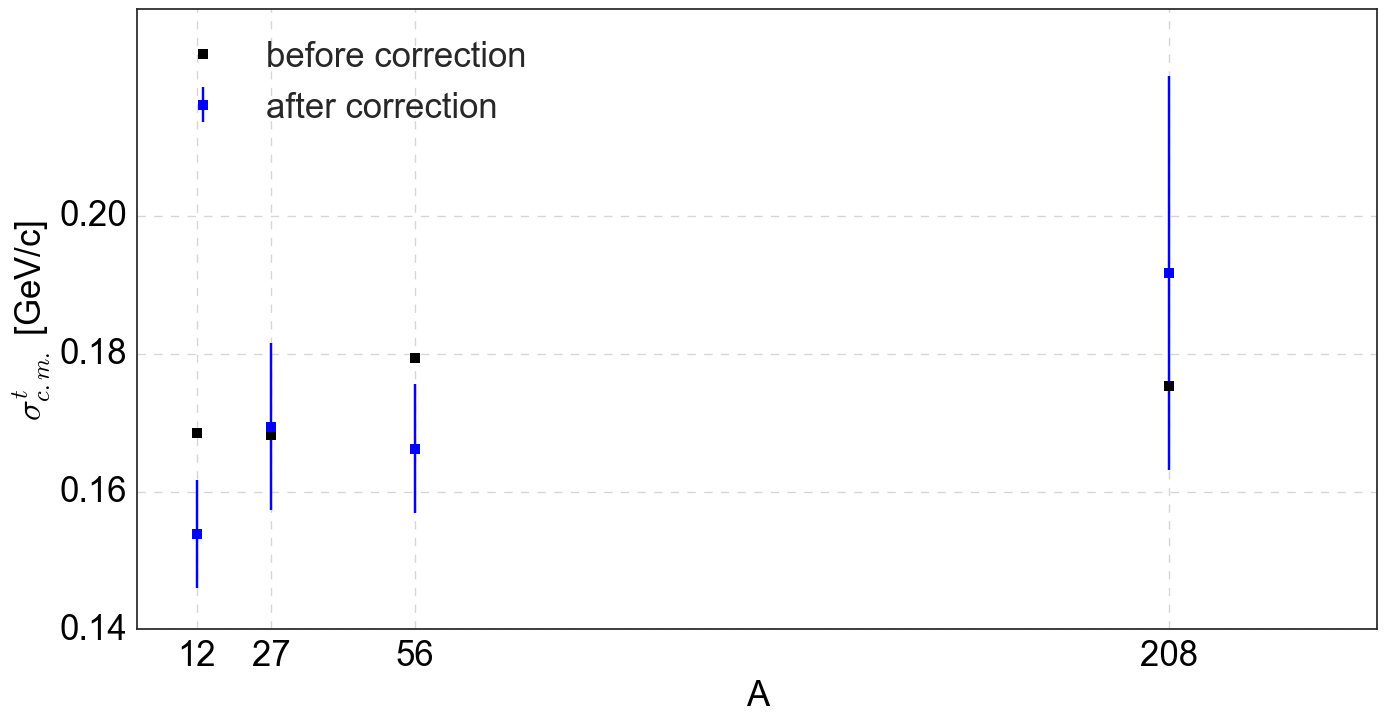

In [67]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
plt.plot(cm_pars_with_correction['A'],cm_pars_with_correction['sigma_t'],'s',color='black',label='before correction')
ax.errorbar(x=cm_pars_with_correction['A'],y=cm_pars_with_correction['sigma_t_final'],yerr=cm_pars_with_correction['sigma_t_final_Err'],fmt='s',color='blue',ecolor='blue',label='after correction')

set_axes(ax,'A','$\\sigma_{c.m.}^{t}$ [GeV/c]')
ax.xaxis.set_ticks([12,27,56,208]);ax.yaxis.set_ticks([0.14,0.16,0.18,0.2]);
ax.grid(linestyle='--',alpha=0.8)
ax.legend(fontsize=25,loc='best')

In [68]:
ColleCalc = pd.DataFrame({'A':[4,12 , 27 , 56 , 208],
                        'allpairs':[0.110,0.140,0.144,0.146,0.145],
                        'nl00':[0.110,0.156,0.164,0.172,0.178]},
                         index = ['$^{4}$He','$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb'])
CiofiCalc = pd.DataFrame({'A':[4 , 12 , 16 , 40 , 56 , 208], # 3 , 
                        's_t':[0.0899 , 0.1393 , 0.1272 , 0.1407 , 0.1328 , 0.1511]}, # 0.0724
                         index = ['$^{4}$He','$^{12}$C','$^{16}$O','$^{40}$Ca','$^{56}$Fe','$^{208}$Pb']) # '$^{3}$He',
MonizCalc = pd.DataFrame({'A':[12 , 40 , 208],
                        '3kF/4':[0.1658 , 0.1883 , 0.1988]},
                         index = ['$^{12}$C','$^{40}$Ca','$^{208}$Pb'])

BNL_Data = pd.DataFrame({'A':[12],'sigma_t_final':[0.143],'sigma_t_final_Err':[0.017]},index = ['$^{12}$C'])
HallA_Data = pd.DataFrame({'A':[12],'sigma_t_final':[0.136],'sigma_t_final_Err':[0.020]},index = ['$^{12}$C'])
Korover_Data = pd.DataFrame({'A':[4],'sigma_t_final':[0.100],'sigma_t_final_Err':[0.020]},index = ['$^{4}$He'])

WI_Data = pd.DataFrame({'A':[ 12 , 27 , 56 , 208], 
                        'sigma_t_final':[0.158 , 0.156 , 0.181 , 0.174], 
                        'sigma_t_final_Err':[0.012 , 0.019 , 0.011 , 0.016]}, 
                         index = ['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']) 

In [69]:
def plot_data(data , Ashift=0, fmt='o', marker='^',color='red',
                       markersize=15, linewidth=4, 
                       vary=None , varyerr=None , label=None ):
    ax.errorbar((data['A']+Ashift), data['sigma_t_final'], yerr=data['sigma_t_final_Err'],                
                color=color, marker=marker,markersize=markersize,linewidth=linewidth, fmt=fmt,label=label)
    
def plot_calculation_line( data , varx='A',kind='nearest' , vary=None , color='blue' ,linestyle='--', label=None, linewidth=4):
    x = data[varx]
    y = data[vary]
    itp = interp1d(x,y, kind='linear')

    if kind is None:
        f = interp1d( x , y )
    else:
        f = interp1d( x , y ,kind=kind)

    window_size, poly_order = 101, 4
    xnew = np.linspace(x.min(),x.max(), num=500, endpoint=True)
    yy_sg = savgol_filter(itp(xnew), window_size, poly_order)
    plt.plot( xnew, yy_sg, linestyle, color=color , label=label, linewidth=linewidth )

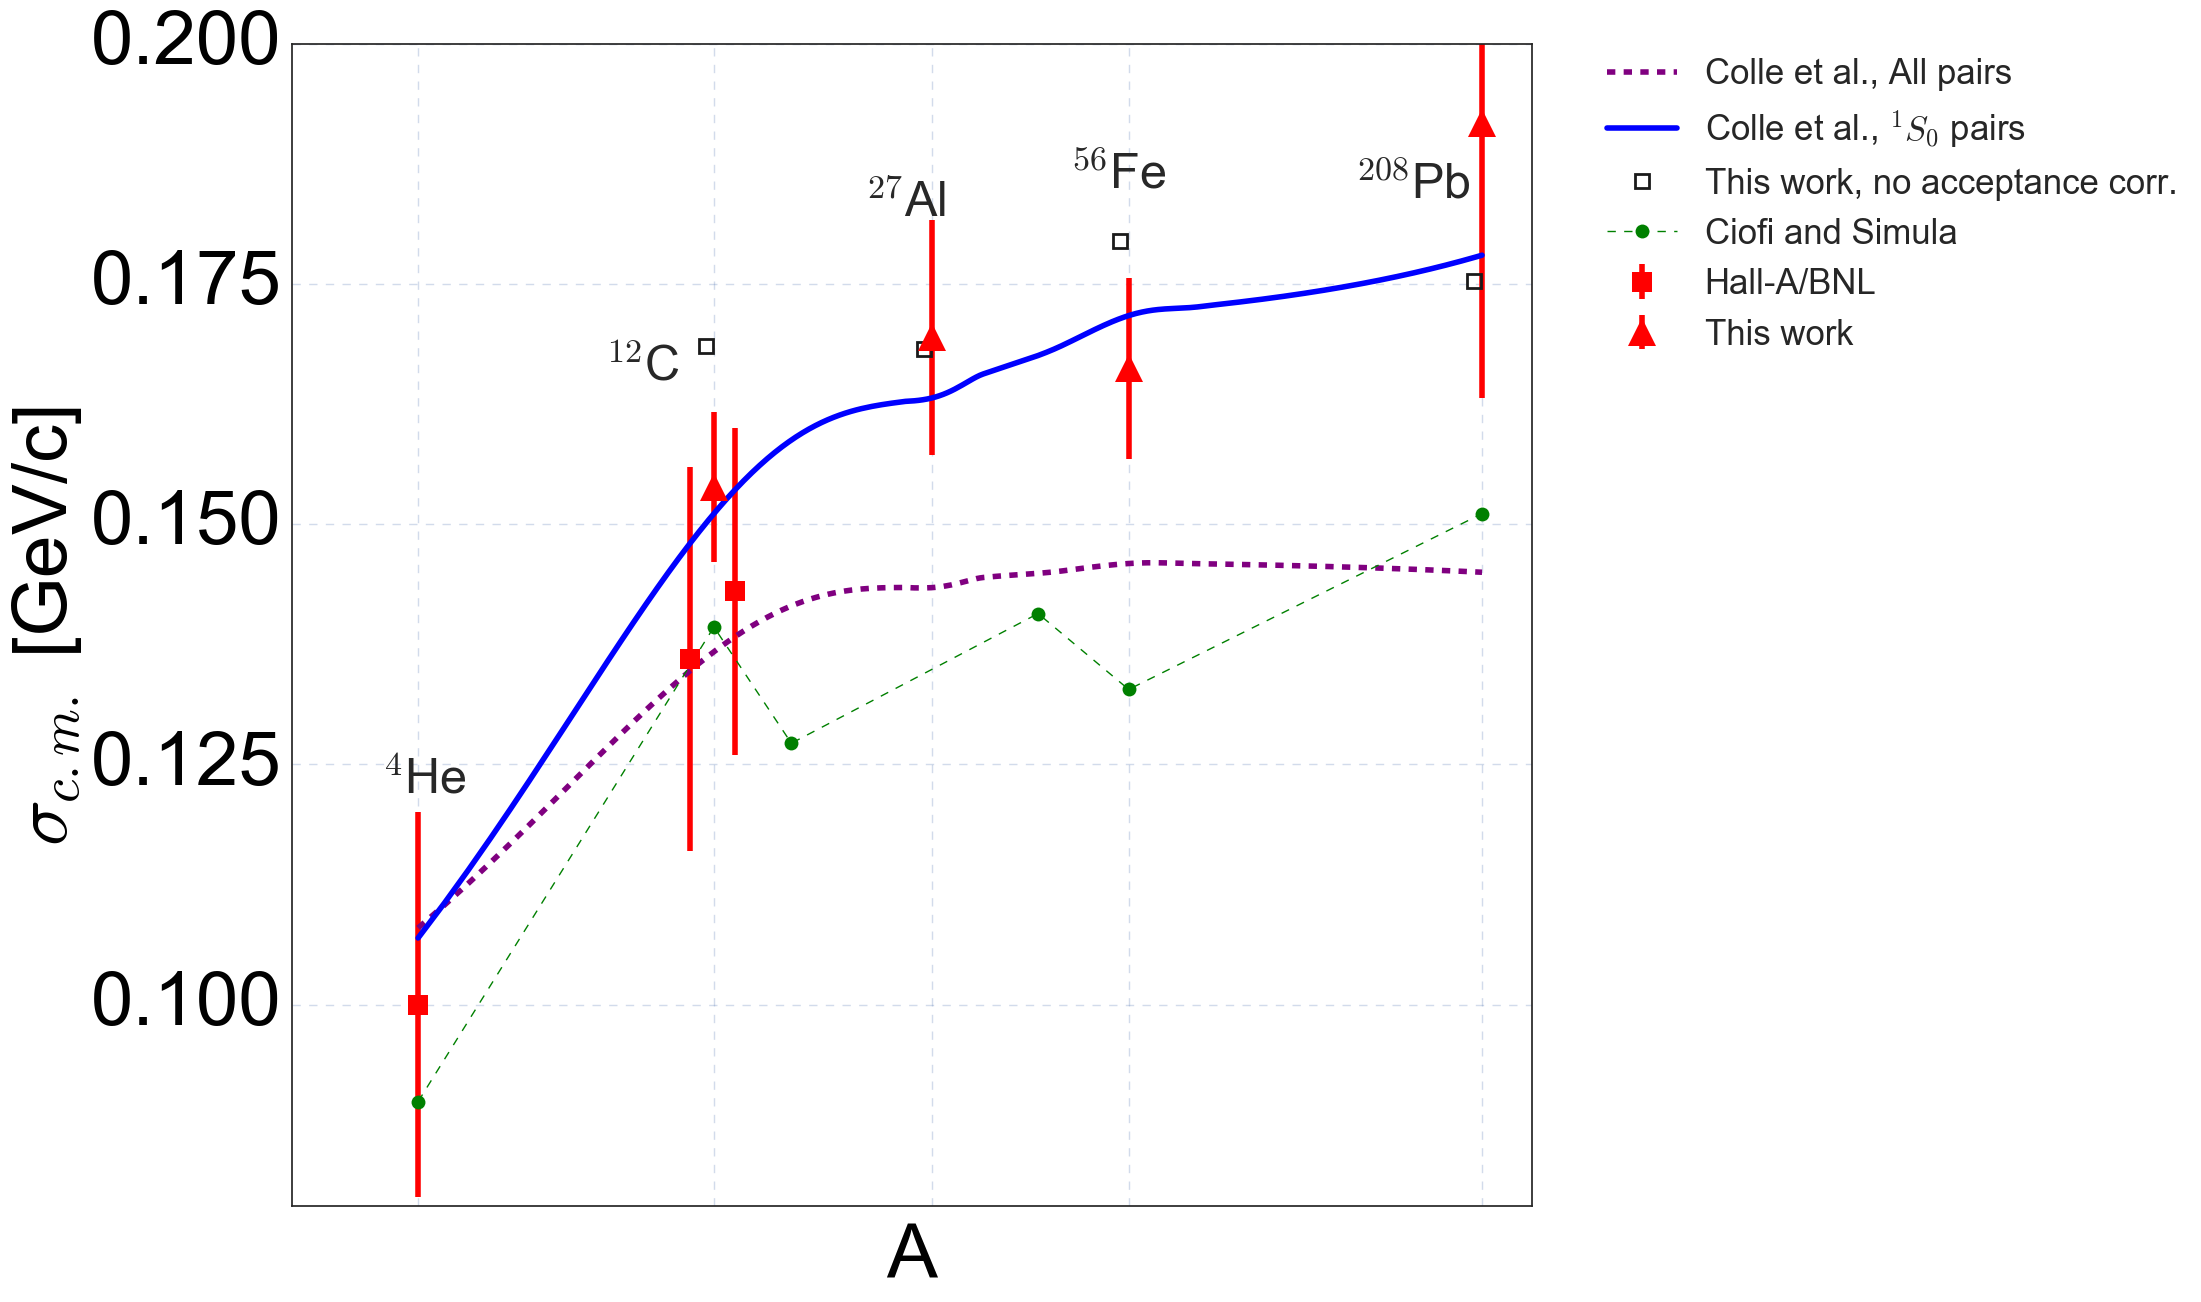

In [72]:
s=30
fig, ax = plt.subplots(figsize=(16,15))
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='allpairs',color='purple' ,label='Colle et al., All pairs')
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' ,linestyle='-', vary='nl00',label='Colle et al., $^1S_0$ pairs')
ax.errorbar(CiofiCalc.A, CiofiCalc.s_t,color='green',fmt='--o',ms=10,linewidth=1,label='Ciofi and Simula')

plot_data( data=BNL_Data, Ashift=1 , marker='s', label=None )
plot_data( data=HallA_Data, Ashift=-1 , marker='s' , label='Hall-A/BNL' )
plot_data( data=Korover_Data , marker='s' , label=None )

ax.plot(0.97*cm_pars['A'], cm_pars['sigma_t'] ,color='red', marker='s',mfc='none',lw = 2, mew = 2, ms = 10, linewidth=0, label='This work, no acceptance corr.')
plot_data( data=cm_pars_with_correction, label='This work', markersize=20 )

ax.set_xscale('log')


set_axes(ax , 'A' , '$\sigma_{c.m.}$ [GeV/c]' , fontsize=55 , xticks=[4,12,27,56,208],yticks=[0.1,0.125,0.15,0.175,0.2])
ax.legend(fontsize=25,bbox_to_anchor=(1.05, 1), borderaxespad=0.,loc=2)
ax.grid(b=True, which='major', color='b', linestyle='--',alpha=0.25)

ax.set_xlim(2.5,250);
ax.set_ylim(0.079,0.200);
ax.text(3.5,0.122,'$^4$He',fontsize=35)
ax.text(8,0.165,'$^{12}$C',fontsize=35)
ax.text(21,0.182,'$^{27}$Al',fontsize=35)
ax.text(45,0.185,'$^{56}$Fe',fontsize=35)
ax.text(130,0.184,'$^{208}$Pb',fontsize=35)

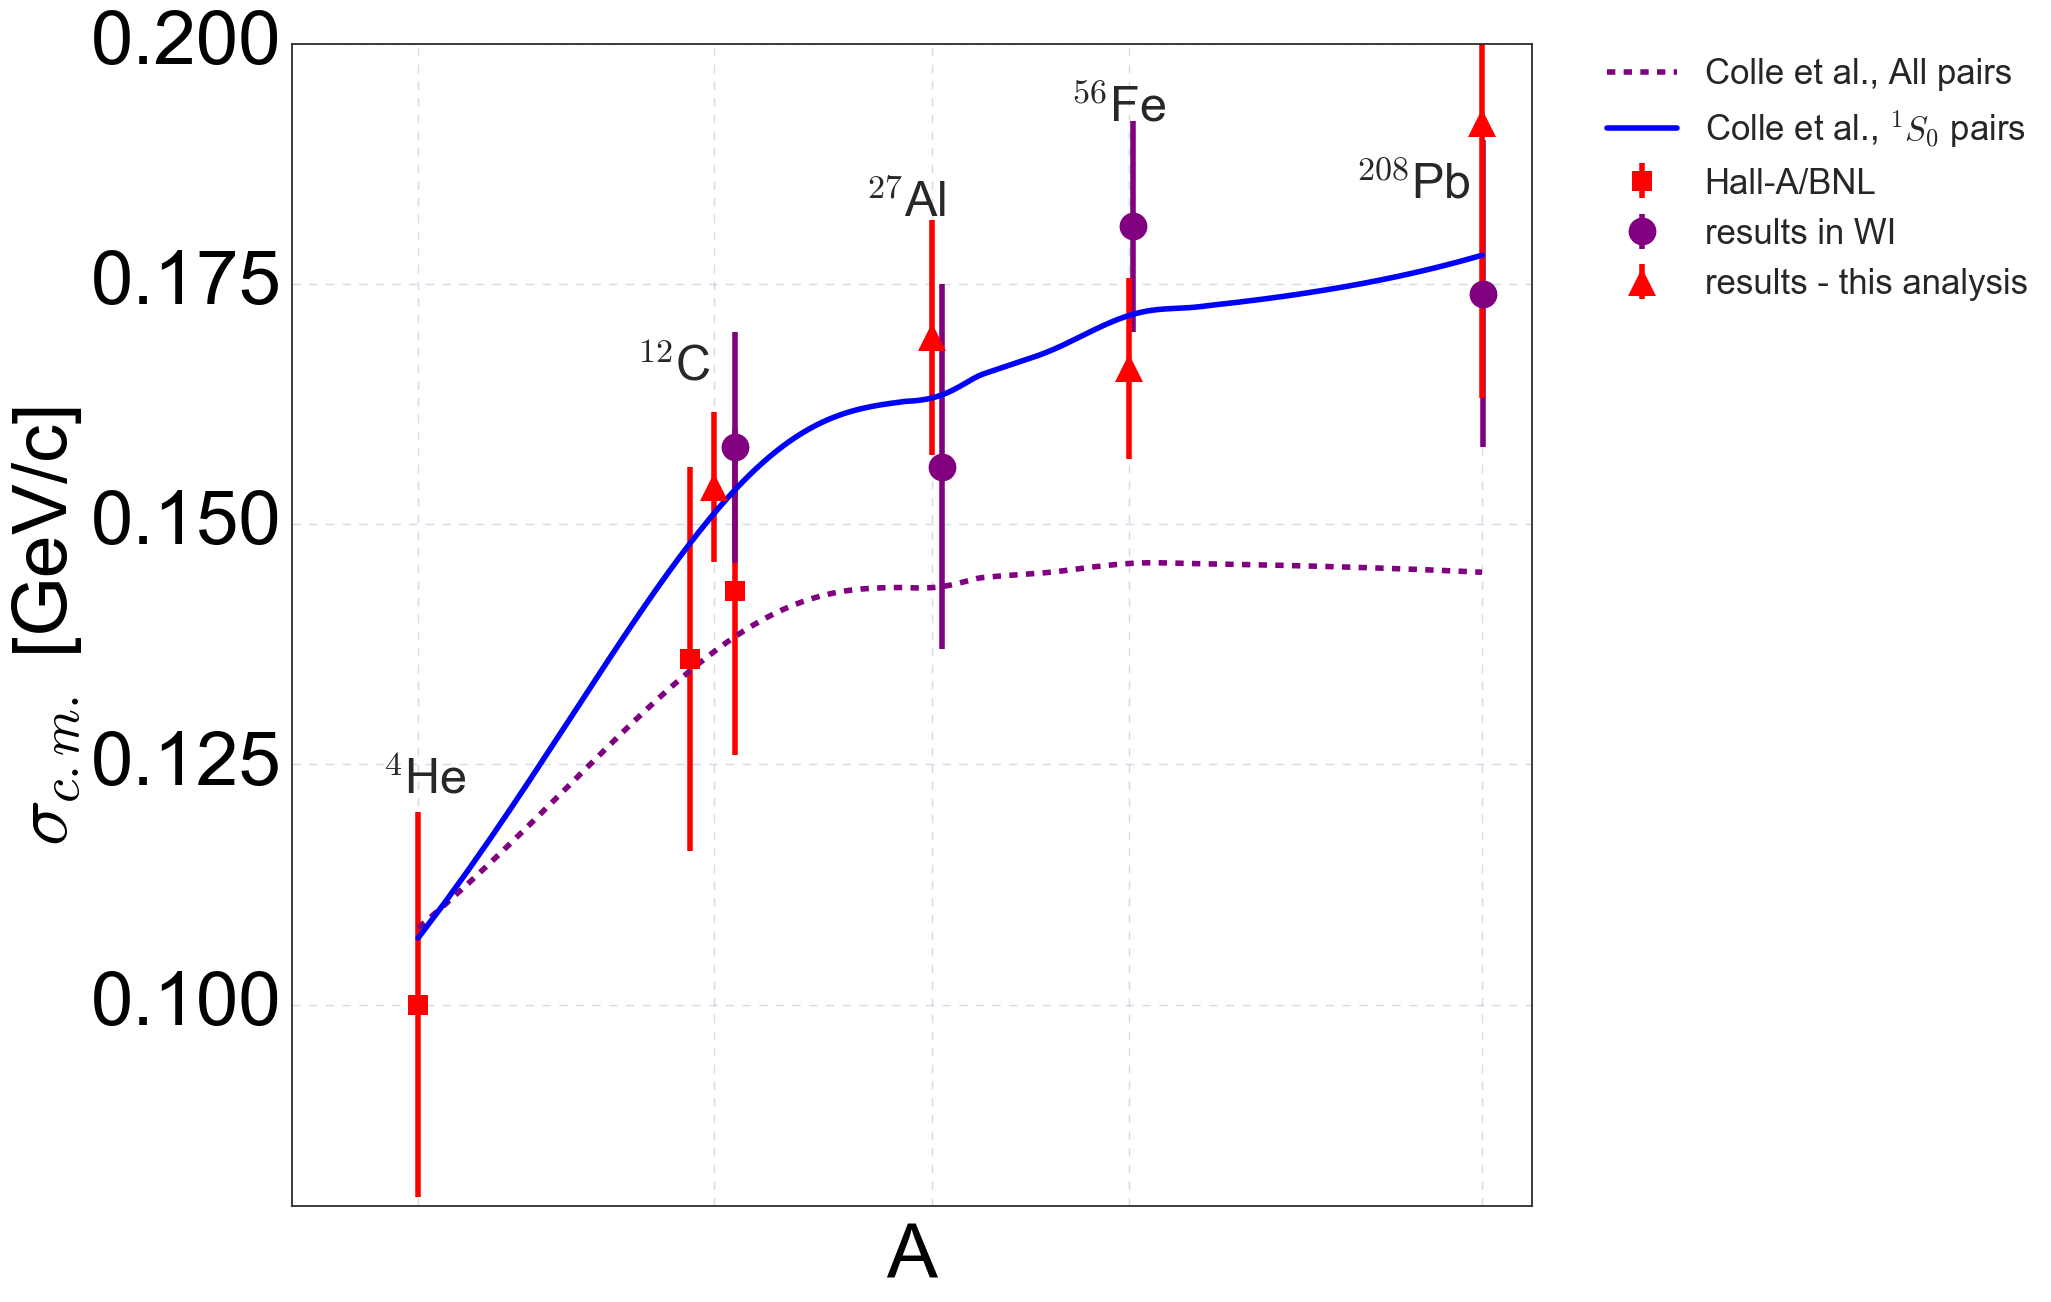

In [74]:
fig, ax = plt.subplots(figsize=(16,15))
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' , vary='allpairs',color='purple' ,label='Colle et al., All pairs')
plot_calculation_line( kind='slinear',data=ColleCalc, varx='A' ,linestyle='-', vary='nl00',label='Colle et al., $^1S_0$ pairs')

plot_data( data=BNL_Data, Ashift=1 , marker='s', label=None )
plot_data( data=HallA_Data, Ashift=-1 , marker='s' , label='Hall-A/BNL' )
plot_data( data=Korover_Data , marker='s' , label=None )

plot_data( data=WI_Data, label='results in WI',Ashift=1,  markersize=20 , marker='o', color='purple')
plot_data( data=cm_pars_with_correction, label='results - this analysis', markersize=20 )

ax.set_xscale('log')

set_axes(ax , 'A' , '$\sigma_{c.m.}$ [GeV/c]' , fontsize=55 , xticks=[4,12,27,56,208],yticks=[0.1,0.125,0.15,0.175,0.2])
ax.legend(fontsize=25,bbox_to_anchor=(1.05, 1), borderaxespad=0.,loc=2)
ax.grid(b=True, which='major', color='b', linestyle='--',alpha=0.25)

ax.set_xlim(2.5,250);
ax.set_ylim(0.079,0.200);
ax.text(3.5,0.122,'$^4$He',fontsize=35)
ax.text(9,0.165,'$^{12}$C',fontsize=35)
ax.text(21,0.182,'$^{27}$Al',fontsize=35)
ax.text(45,0.192,'$^{56}$Fe',fontsize=35)
ax.text(130,0.184,'$^{208}$Pb',fontsize=35)

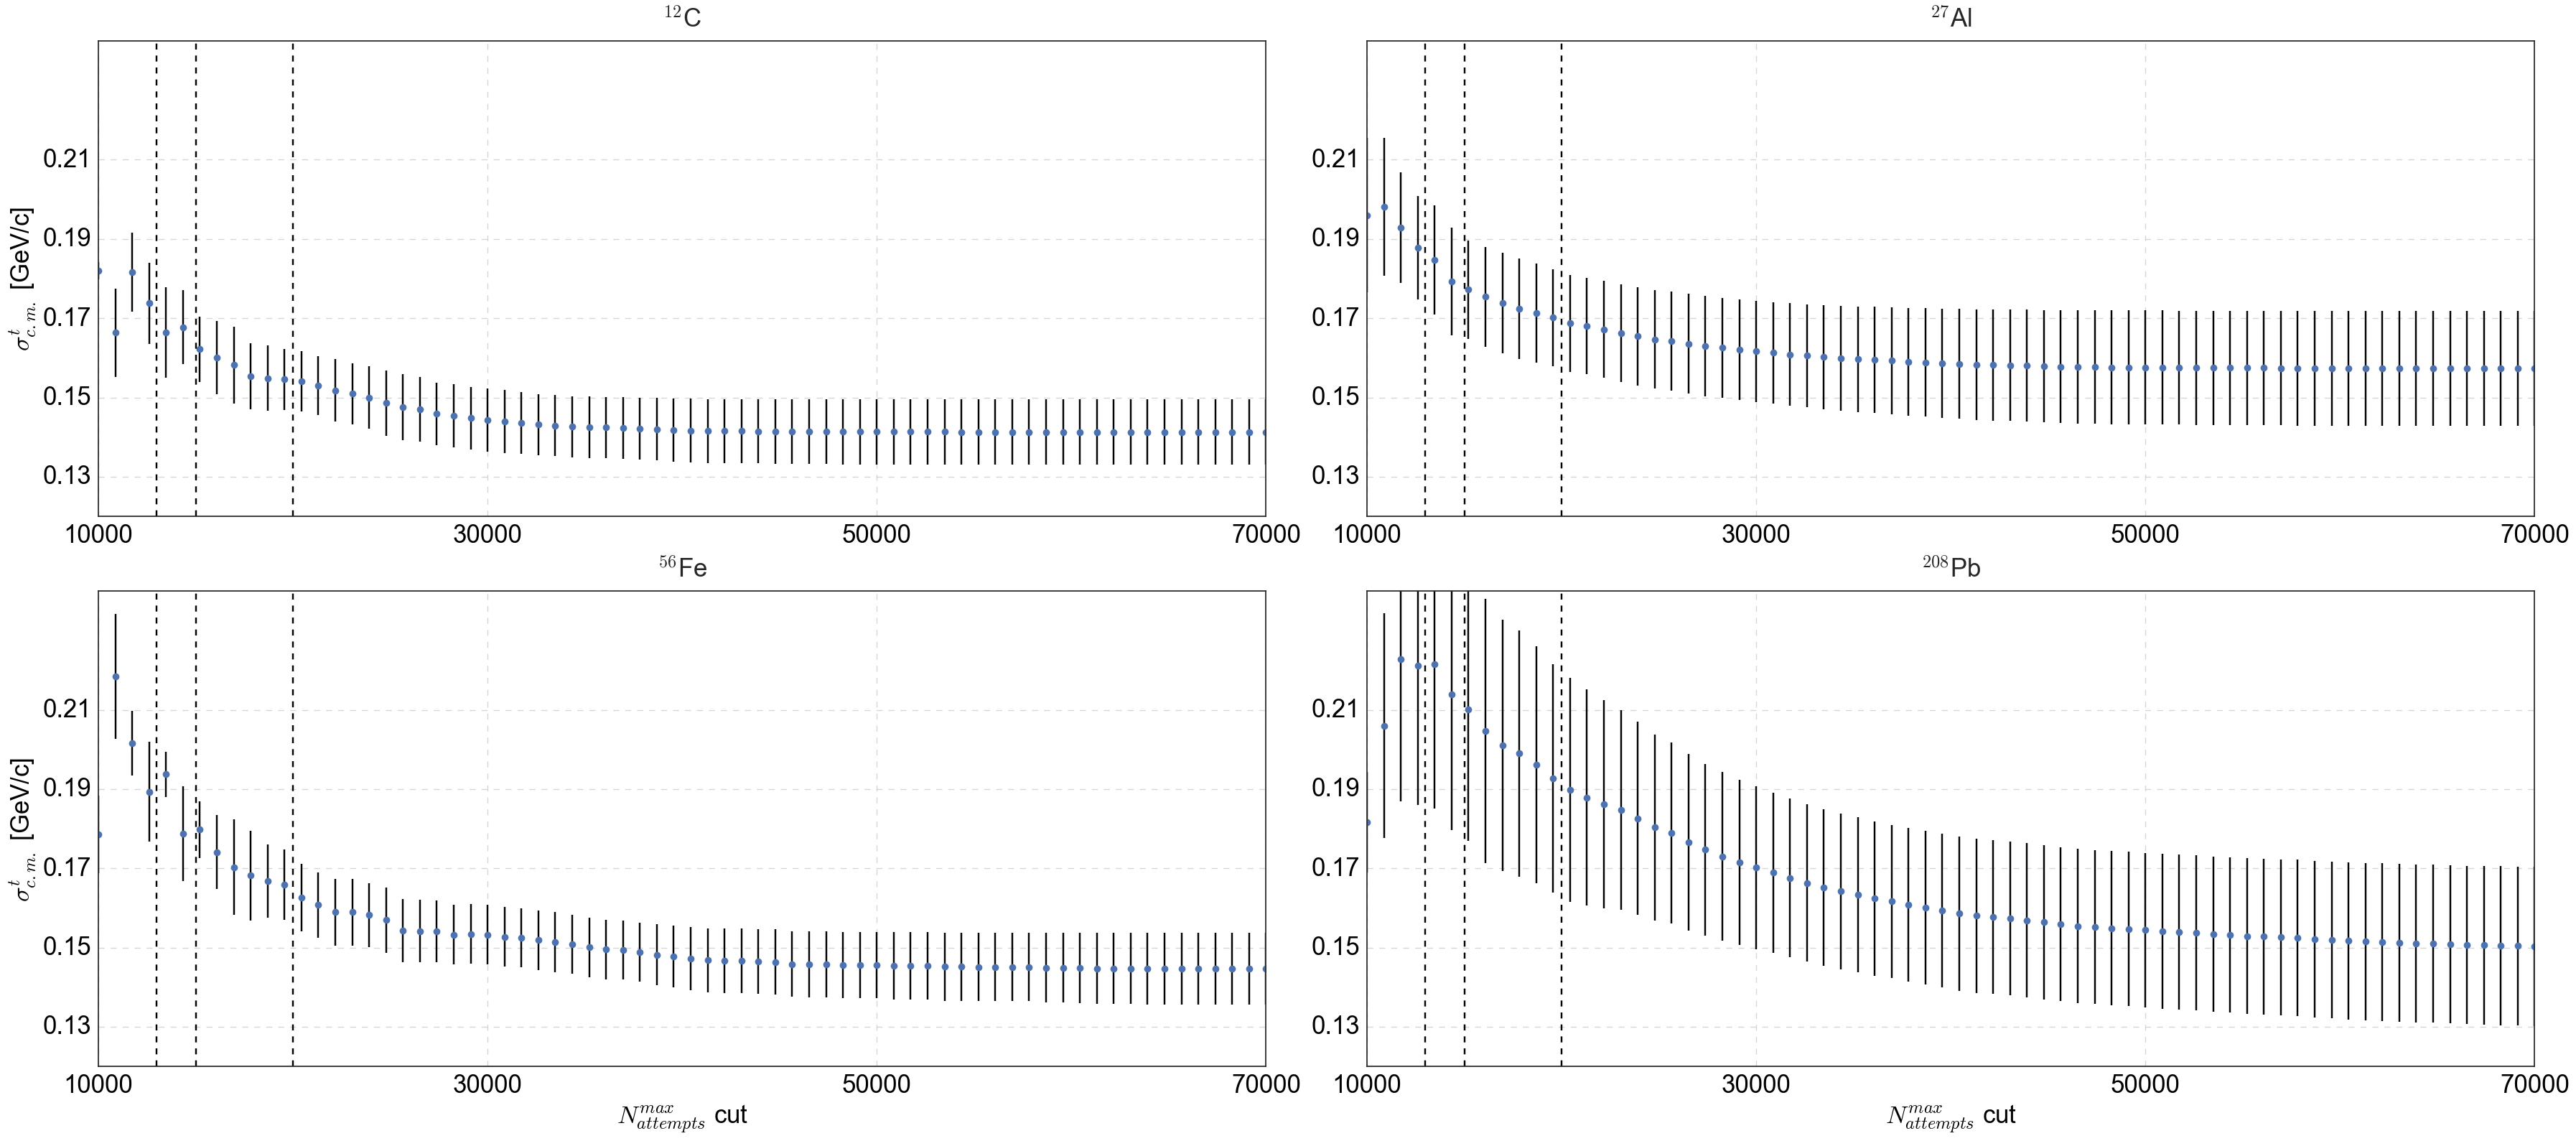

In [6]:
Nmax_Nattempts_cuts = 70

fig = plt.figure(figsize=(36,16))


for i_tgt,target,name in zip(range(4),['C12','Al27','Fe56','Pb208'],['$^{12}$C','$^{27}$Al','$^{56}$Fe','$^{208}$Pb']):
    max_Nattempts_cuts = np.linspace( 10000 , 70000 , Nmax_Nattempts_cuts )
    frac , mean_gen_sigmaX , mean_gen_sigmaX_err = [] , [] , []
    for max_Nattempts_cut in max_Nattempts_cuts:
        reduced = sims[sims['Nattempts']<max_Nattempts_cut]
        x = reduced['gen_SigmaX']
        weights=reduced['ks_Pval_pcmX_pcmY_pcmZ_scaled_1e20_'+target]
        frac.append(100*float(len(reduced))/len(sims))
        mean_gen_sigmaX.append (np.average( x , weights=weights) )
        mean_gen_sigmaX_err.append ( np.sqrt( np.average( np.square( x-mean_gen_sigmaX[-1] ) , weights=weights)) )

    ax=fig.add_subplot(2,2,i_tgt+1)
    plt.errorbar( max_Nattempts_cuts , y=mean_gen_sigmaX , yerr=mean_gen_sigmaX_err , fmt='o' , ecolor='black')
    set_axes(ax,'$N_{attempts}^{max}$ cut' if i_tgt==2 or i_tgt==3 else ''
             ,'$\\sigma_{c.m.}^{t}$ [GeV/c]' if i_tgt==0 or i_tgt==2 else ''
             ,title=name,do_add_grid=True, yticks=[0.13,0.15,0.17,0.19,0.21])
    ax.set_ylim(0.12,0.24)
    plt.plot([13000,13000],ax.get_ylim(),'--',color='black')
    plt.plot([15000,15000],ax.get_ylim(),'--',color='black')
    plt.plot([20000,20000],ax.get_ylim(),'--',color='black')
    
plt.tight_layout()

In [12]:
reduced_sims[['run'        
        ,'gen_SigmaX','gen_a1','gen_a2','gen_b1','gen_b2'
        ,'recMeanX','recMeanY','recSigmaX','recSigmaY'
        ,'reca1','reca2','recb1','recb2'

        ,'ks_local_Pval_pcmX_C12','ks_local_Pval_pcmY_C12'
        ,'ks_local_Pval_pcmZ_bin0_C12','ks_local_Pval_pcmZ_bin1_C12','ks_local_Pval_pcmZ_bin2_C12','ks_local_Pval_pcmZ_bin3_C12','ks_local_Pval_pcmZ_bin4_C12'
        ,'ks_PvalTotal_C12'

        
        ,'ks_local_Pval_pcmX_Al27','ks_local_Pval_pcmY_Al27'
        ,'ks_local_Pval_pcmZ_bin0_Al27','ks_local_Pval_pcmZ_bin1_Al27','ks_local_Pval_pcmZ_bin2_Al27','ks_local_Pval_pcmZ_bin3_Al27','ks_local_Pval_pcmZ_bin4_Al27'
        ,'ks_PvalTotal_Al27'


        ,'ks_local_Pval_pcmX_Fe56','ks_local_Pval_pcmY_Fe56'
        ,'ks_local_Pval_pcmZ_bin0_Fe56','ks_local_Pval_pcmZ_bin1_Fe56','ks_local_Pval_pcmZ_bin2_Fe56','ks_local_Pval_pcmZ_bin3_Fe56','ks_local_Pval_pcmZ_bin4_Fe56'
        ,'ks_PvalTotal_Fe56'


        ,'ks_local_Pval_pcmX_Pb208','ks_local_Pval_pcmY_Pb208'
        ,'ks_local_Pval_pcmZ_bin0_Pb208','ks_local_Pval_pcmZ_bin1_Pb208','ks_local_Pval_pcmZ_bin2_Pb208','ks_local_Pval_pcmZ_bin3_Pb208','ks_local_Pval_pcmZ_bin4_Pb208'
        ,'ks_PvalTotal_Pb208'


       ]].to_root('/Users/erezcohen/Desktop/DataMining/Analysis_DATA/ppSRCcm/random_parameters_results/Ntimes10_OrTrees_Nattampts.root'
               ,key='simsTree')